# Coursework 1

### Deadline: 29th October 2019, 4pm
### Submission format
Solve all the questions directly in this notebook. Some tasks require writing and running code. Other times you are asked to write answers to questions within the 'Markdown' cells and the answers are prompted by  '**Your answer:**'. 

Submit the solved Jupyter notebook with the code and answers to KEATS. Make sure that all your code is working. We will mark the results that appear after your cells not the code, so please make sure everything that we ask is printed and displayed. You do not need to submit the data files with your notebooks. Your submission should consists of  __a single Python notebook file named  CW1_Surname_Forname_degree.ipynb__ where degree refers to BEng/MEng/MSc/MRes.

Marks obtained in this coursework will be converted to 
* BEng/MEng __25% of your final grade__
* MSc/MRes __15% of your final grade__

Any questions about the coursework should be sent to maria.murgasova@kcl.ac.uk

## Question 1
### Your Own Ridge Regression

The purpose of this question is to implement your own Ridge regression and apply to prediction of gestational age (GA) from volumes of 86 brain structures.

The data are in the file "GA-structure-volumes-preterm.csv". It contains GA in column zero and volumes of 86 structures in columns 1,...,86. The code below loads the file and creates label/target vector $\mathbf{y}$ and feature matrix $\mathbf{X}$. Run the code.

In [1]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_csv("GA-structure-volumes-preterm.csv",header=None)
data = df.values
print('Dimension of the data is ', data.shape)

# Create label/target vector
y = data[:,0] 
# Create feature matrix
X = np.ones(data.shape);
X[:,1:]=data[:,1:] 
print('X: ')
print(X)

Dimension of the data is  (164, 87)
X: 
[[1.    0.492 0.617 ... 5.85  0.264 0.203]
 [1.    0.497 0.624 ... 6.15  0.286 0.286]
 [1.    0.532 0.594 ... 5.89  0.386 0.301]
 ...
 [1.    0.504 0.643 ... 4.98  0.176 0.148]
 [1.    0.847 0.987 ... 8.19  0.499 0.494]
 [1.    0.704 0.853 ... 6.52  0.313 0.25 ]]


__Task 1.1 [6 marks]__ 

Print the dimensions of the feature matrix $X$ and target/label vector $y$. Explain the meaning of each dimension

In [2]:
# Print dimensions X
print("X shape: ", X.shape)

total_samples = X.shape[0]
print('Number of samples is ', total_samples)
total_features = X.shape[1]
print('Number of features is ', total_features)
print("------------------------------------")
# Print dimensions y
print("y shape:", len(y))
print('Number of labels is', len(y))

X shape:  (164, 87)
Number of samples is  164
Number of features is  87
------------------------------------
y shape: 164
Number of labels is 164


__Your answer:__

##### Feature Matrix X
For the feature matrix X, the rows represent the number of samples and each column represents a feature.
This means that we have 164 samples and 87 different features. The features represent different brain structures
It is important to note than the first feature is the bias term

##### Label Vector Y
The label vector y is a group of samples that have been tagged with a label (observed values)

__Task 1.2 [9 marks]__ 
* Implement your own Ridge regression using functions available in `numpy` package. Do not use `sklearn`. Calculate the weight vector $w$ using the formula $w=(X^TX+\lambda I)^{-1}X^Ty$. Use value $\lambda=1$. 
* Print the the dimension of the resulting vector $w$ and check that it is correct.
* Evaluate the prediction using the feature vector of the first subject (Subject 0) in the dataset and print the result. Check that it is similar to the true GA.

In [3]:
# Implement equation
def getWeightVector(features,labels,lamda):
    
    #Calculate the weight vector = (Xt*X + lambda*I)^-1 * Xt * y
    
    #Transpose:
    Xt = np.transpose(features)
    
    #Multiply transpose with features
    XtX = np.matmul(Xt,features)
    
    # Add the lambda and inverse
    XtXi = np.linalg.inv(np.add(XtX, lamda))
    
    #Multiply XtXi with Xt.y
    return np.matmul(XtXi,np.matmul(Xt,labels))

# Reshape the label matrix
y = y.reshape(-1,1)

# Calculate the weight vector
I = np.identity(X.shape[1])
weight_vector = getWeightVector(X,y,I)


# Print dimension of w
print('Weight vector w:')
print(weight_vector.shape)
print("The weight vector has the same rows as the number of features which is correct")

# Evaluate GA on first subject and print the result
first_subject_evaluation = np.matmul(X[0], weight_vector)


# Check it makes sense
similarity = first_subject_evaluation - data[0][0]
print("--------------------------------")
print("First subject GA: ", round(data[0][0],2))
print("First subject GA evaluation: ", round(first_subject_evaluation[0],2))
print("Difference between the two: ", round(similarity[0],2))
print("They are very similar")

Weight vector w:
(87, 1)
The weight vector has the same rows as the number of features which is correct
--------------------------------
First subject GA:  35.71
First subject GA evaluation:  36.04
Difference between the two:  0.33
They are very similar


__Task 1.3 [6 marks]__ 
* Predict the target/label vector $\hat{\mathbf{y}}$ and print its shape. 
* Plot true vs. predicted labels. Annotated the axis of the plot.
* Calculate RMSE on the whole set and print

RMSE:  1.27


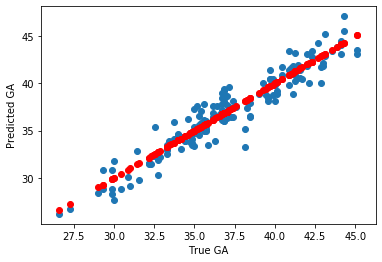

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Predict target/label vector
y_predicted = np.matmul(X,weight_vector)

# Plot true vs. predicted labels
def plotTrueVsPredicted(features,labels,labels_predicted,figureNumber=0,title = None):
    
    # In case we need to show more than one plot in the same cell
    plt.figure(figureNumber)
    plt.scatter(labels,labels_predicted)
    plt.scatter(labels,labels,c='r')
    plt.xlabel('True GA')
    plt.ylabel('Predicted GA')
    if title is not None:
        plt.title(title)

plotTrueVsPredicted(X, y, y_predicted)   

# Calculate and print RMSE
def getRMSE(labels, labels_predicted, samples):
    error = labels - labels_predicted
    return np.sqrt(np.sum(error**2)/samples)

rmse = getRMSE(y , y_predicted,total_samples)    
print('RMSE: ', round(rmse,2))


__Task 1.4 [4 marks]__ 

Let's split the data into training and test set to evaluate how the model generalises to unseen data.
* Your training test will be composed of the first 120 subjects
* Your test set will be composed of last 44 subjects
* Fit the ridge regression to the training set
* Calculate RMSE between true and predicted labels on test set

RMSE on test data  1.95


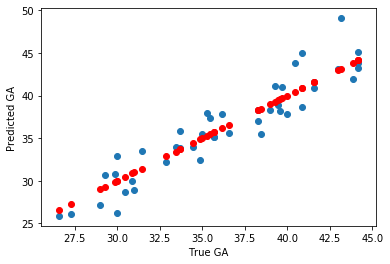

In [5]:
# Training set - first 120 subjects 
X_train = X[:120,:]
y_train = y[:120]

# Test set - last 44 subjects
X_test = X[120:,:]
y_test = y[120:]

# Perform ridge regression on training test
I_train = np.identity(X_train.shape[1])
weight_vector_from_training = getWeightVector(X_train, y_train, I_train)

# Predict on test set
y_predicted_from_training = np.matmul(X_test, weight_vector_from_training)
plotTrueVsPredicted(X_test, y_test, y_predicted_from_training)

# Calculate and print RMSE on test set
rmse_on_test_data = getRMSE(y_test, y_predicted_from_training, len(y_test))
print('RMSE on test data ', round(rmse_on_test_data,2))


__Task 1.5 [5 marks]__

Implementation of Ridge regression in `sklearn` performs slighly better than implementation accorging to our equation. This is because we can generally obtain better fit if we so not penalise the bias term $w_0$. Our original equation penalises all weights using equal penatly weight $\lambda$. We would want to have penalty weight $\lambda$ only for the weights $(w_1,...,w_D)$ and for $w_0$ we would like penalty weight zero. We can do that by implementing following equation:

$$w=(X^TX+\Lambda)^{-1}X^Ty$$

$$\Lambda = \begin{pmatrix} 
0 & 0 & \cdots & 0 \\ 
0 & \lambda & \cdots & 0 \\
\vdots & \vdots & \cdots & \vdots \\
0 & 0 & \cdots & \lambda
\end{pmatrix}$$

* Create matrix $\Lambda$ and print it. Use $\lambda = 1$
* Implement the Ridge regression with this new penalty
* Fit the weight vector using the training data 
* Evaluate RMSE on the test data 
* Compare to the previous result.

RMSE with lambda:  1.52

------------------------------

RMSE with proper penalty:  1.52
RMSE without proper penalty 1.95
Difference:  0.43


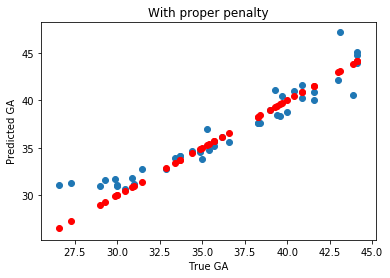

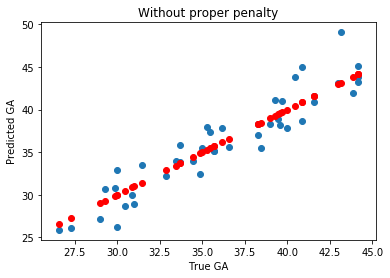

In [6]:
# Create matrix Lambda
lamda = np.identity(X_train.shape[1])
lamda[0,0] = 0

# Fit vector w with new penalty
weight_vector_proper_penalty = getWeightVector(X_train, y_train,lamda)

# Predict on test set
y_predicted_from_training_proper_penalty = np.matmul(X_test, weight_vector_proper_penalty)

# Calculate and print RMSE on test set
test_samples = len(y_test)
rmse_with_proper_penalty = getRMSE(y_test, y_predicted_from_training_proper_penalty, len(y_test))
print('RMSE with lambda: ', round(rmse_with_proper_penalty,2))

#Compare the two
plotTrueVsPredicted(X_test,y_test,y_predicted_from_training_proper_penalty,0,'With proper penalty')
plotTrueVsPredicted(X_test,y_test,y_predicted_from_training,1,'Without proper penalty')

print("\n------------------------------\n")
print('RMSE with proper penalty: ', round(rmse_with_proper_penalty,2))
print('RMSE without proper penalty', round(rmse_on_test_data,2))
print('Difference: ', round(rmse_on_test_data - rmse_with_proper_penalty,2))

**Your answer:** 

By penalising only for the weights w1 to wd, we further improve our model and thus are able to provide better predictions.
RMSE results:
* RMSE with proper penalty:  1.52
* RMSE without proper penalty 1.95
* Difference:  0.43

**Total Q1: 30 marks**

## Question 2
### Multi-class classification
The goal of this question is to develop a machine learning algorithm to diagnose severity of heart-failure on **NYHA** scale, that rates severity from 1 to 4. We will use two features **EF** and **QRS**. The code bellow loads the data and print summary statistics.

In [7]:
# Load csv file
df = pd.read_csv("heart_failure_data.csv")  
data = df.values

# Print number of samples
print('Number of samples: ',data.shape[0])

# summary statistics
df.describe()

Number of samples:  120


,NYHA,EF,QRS
count,120.000000,120.000000,120.000000
mean,1.850000,44.595472,119.183333
std,1.009618,15.624452,33.294960
min,1.000000,8.270677,80.000000
25%,1.000000,30.657606,88.750000
50%,1.500000,49.487925,102.500000
75%,3.000000,57.059152,146.000000
max,4.000000,70.000000,200.000000


Let's now create a feature matrix and a label vector. Run the code bellow and check the dimensions of your data.

In [8]:
from sklearn.preprocessing import StandardScaler
Features = StandardScaler().fit_transform(data[:,1:])
Labels = data[:,0]-1
print('Features dims: {}  Labels dims: {}'.format(Features.shape, Labels.shape))

Features dims: (120, 2)  Labels dims: (120,)


__Task 2.1 [5 marks]__ 

Create a scatter plot of your data, showing the two features on x and y axis and differentiate labels by marker type and color. To do that create a function `plotData()` and call it from the same cell. Make sure your plot is properly annotated.

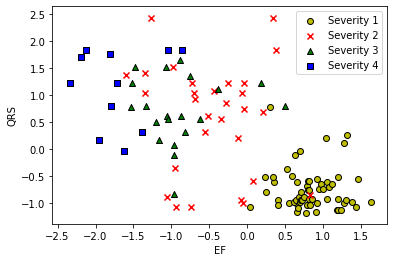

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# define function
def plotData():
    plt.scatter(Features[Labels==0, 0], Features[Labels==0, 1], marker = 'o', c='y', label="Severity 1",edgecolor='black')
    plt.scatter(Features[Labels==1, 0], Features[Labels==1, 1], marker = 'x', c='r', label="Severity 2",edgecolor='black')
    plt.scatter(Features[Labels==2, 0], Features[Labels==2, 1], marker = '^', c='g', label="Severity 3",edgecolor='black')
    plt.scatter(Features[Labels==3, 0], Features[Labels==3, 1], marker = 's', c='b', label="Severity 4",edgecolor='black')
    plt.legend()
    plt.xlabel(df.columns.values[1])
    plt.ylabel(df.columns.values[2])
           
plotData()

__Task 2.2 [3 marks]__ 

Check whether your dataset is balanced. To do that
* Plot histogram of the labels
* Count number of labels of each class and print it.

Severity 1 :  60
Severity 2 :  29
Severity 3 :  20
Severity 4 :  11


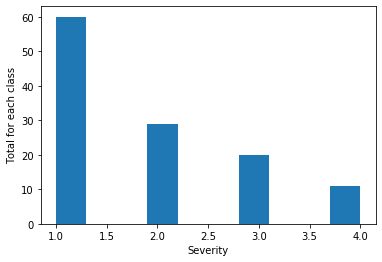

In [10]:
# plot histogram of labels
plt.hist(Labels+1)
plt.xlabel('Severity');
plt.ylabel('Total for each class');

# calculate numbers for each class and print
unique, counts = np.unique(Labels, return_counts=True)
occurances = dict(zip(unique, counts))

for item in occurances:
    print("Severity",  int(item+1),  ": ", occurances[item])


__Task 2.3 [4 marks]__ 

Train a softmax classifier to predict NYHA class. Tune the regularisation parameter using `gridSearch` on the grid of values $[10^{-3}, 10^{-2},...,10^3]$ and print the following results:
* cross-validated accuracy for the best model
* best parameter

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

cv = 5

# select model
model_softmax = LogisticRegression(multi_class="multinomial",solver="lbfgs")

# perform grid search
degrees = [ 10**i for i in range(-3,4) ]
parameters = {"C": degrees}
grid_search = GridSearchCV(estimator=model_softmax, param_grid=parameters,cv=cv)

# perform the search over all parameters by fitting to the features and labels
grid_search.fit(Features,Labels)

# print score
print("Cross Validated Score: ", round(grid_search.best_score_,2))

# print best parameter
best_model_softmax = grid_search.best_estimator_
print("Best C: ", best_model_softmax.C)
best_C = best_model_softmax.C

Cross Validated Score:  0.73
Best C:  1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


__Task 2.4 [2 marks]__ 

Investigate which classes are most often misclassified 
* Predict the labels using `cross_val_predict` and the best estimator from grid search.
* Calculate and print confusion matrix
* Write your observation about most misclassified classes in the markdown box.

[[59  1  0  0]
 [ 4 18  3  4]
 [ 1 12  4  3]
 [ 0  2  2  7]]


Text(0, 0.5, 'True labels')

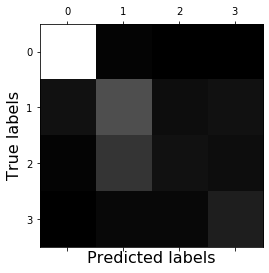

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# predict labels using cross-validation
Labels_predicted = cross_val_predict(best_model_softmax, Features, Labels, cv=cv)

# Calculate and print confusion matrix
confusionMatrix = confusion_matrix(Labels,Labels_predicted)
print(confusionMatrix)

# Plot and annotate for better visualisation
plt.matshow(confusionMatrix, cmap=plt.cm.gray)
plt.xlabel('Predicted labels', fontsize = 16)
plt.ylabel('True labels', fontsize = 16)

**Your answer:**

As seen by the confusion matrix and by examining our data, the most misclassified classes are class 4 and class 3. This is mainly due to the fact that the dataset is not well balanced:
    * Class 1: 60 samples
    * Class 2: 29 samples
    * Class 3: Only 20 samples
    * Class 4: Only 11 samples
    
Class 1 takes up the majority of our dataset with Class 2 following it (although still low in comparison). Therefore it makes sense that classes 3&4 are missclassified more often.

Other than that, our data is non-seperable, making hard for a linear classifier to distignuish. As seen in the chart in the previous task, there is a lot of overlap of different classes in their respective "clusters".

__Task 2.5 [4 marks]__ 

* Create a function `plotDecisionBoundary` that plots decision regions using different colors, the data and annotates the plot. 
* Run the function to display the results of the classification. 
* Decide what is the main reason for the misclassification and write it in the answer box.

Score:  0.758


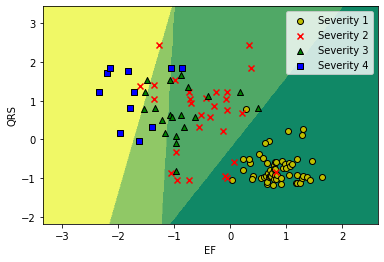

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# create function
def plotDecisionBoundary(model_to_plot, features, predicted_labels):
   
    # plot
    x1 = np.linspace(features[:,0].min()-1, features[:,0].max()+1, 500) 
    x2 = np.linspace(features[:,1].min()-1, features[:,1].max()+1, 500).T
    x1, x2 = np.meshgrid(x1, x2) 
    Feature_space = np.c_[x1.ravel(), x2.ravel()] 

    y=model_to_plot.predict(Feature_space)
    plt.contourf(x1,x2,y.reshape(x1.shape),cmap ='summer')
    plotData()

#Print the score
print("Score: ", round(best_model_softmax.score(Features,Labels),3))

#Plot the decision boundary
plotDecisionBoundary(best_model_softmax, Features, Labels_predicted)

**Your answer:**

Main reasons for misclassification is that the data is non-separable making it hard for a linear classifier

__Task 2.6 [6 marks]__

* Implement polynomial feature transformation to create non-linear classification model using `Pipeline`. Do not forget to scale the polynomial features.
* Using `gridSearchCV` find best polynomial logistic regression model (`degree`=$[1,...,10]$, `C`=$[10^{-5},10^{-4},...,10{^5}]$)

In [14]:
###################################
# this code is to suppress warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
####################################
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
from sklearn.svm import SVC


# Create pipeline for Polynomial softmax
model_poly = Pipeline((("poly_features", PolynomialFeatures()),
                  ("scaler", StandardScaler()),
                  ("log_regression", LogisticRegression(multi_class= 'multinomial', solver='lbfgs'))))

# Define parameter grid
param_grid_poly = {"poly_features__degree": range(1, 11), 
              "log_regression__C": np.logspace(-5, 5, 11)}


# Perform grid search
grid_search_poly = GridSearchCV(model_poly, cv=cv, param_grid=param_grid_poly)
grid_search_poly.fit(Features,Labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=(('poly_features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('log_regression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
            

Display the following results:
* print best polynomial `degree`
* print best parameter `C`
* print best score
* plot the decision regions using function `plotDecisionBoundary`

Best degree:  2
Best C:  0.1
Best score:  0.758


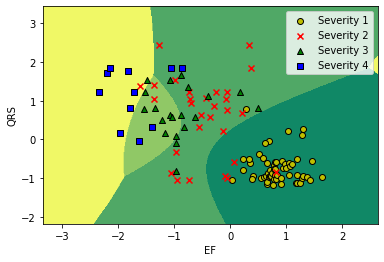

In [15]:
# Get the best model
best_model_poly = grid_search_poly.best_estimator_
# print best degree
best_degree = best_model_poly.named_steps['poly_features'].degree
print('Best degree: ', best_degree)

# print best C
best_c = best_model_poly.named_steps['log_regression'].C
print('Best C: ', best_c)

# print best score
best_score = grid_search_poly.best_score_
print('Best score: ', round(best_score,3))

# Plot the decision boundary
plotDecisionBoundary(best_model_poly,Features, Labels) 

__Task 2.7 [6 marks]__

Implement multi-label support vector classifier using `OneVsRestClassifier` and `SVC`. Tune the parameters of the classifier using `GridSearchCV` using these values:
* `rbf` kernel with `gamma` $[10^{-3},10^{-2},...,10^{3}]$
* `linear` kernel
* `C`= $[10^{-3},10^{-2},...,10{^3}]$

Be patient, this might take a while

In [16]:
from sklearn.multiclass import OneVsRestClassifier

pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                    ('svc', SVC())])

model_onevsrest = OneVsRestClassifier(pipeline)

# select the classifier
# model_onevsrest = OneVsRestClassifier(SVC())
                
# Define parameter grid
degrees = [ 10**i for i in range(-3,4) ]
param_grid = {"estimator__svc__gamma": degrees, 
              "estimator__svc__C": degrees,
              "estimator__svc__kernel" : ['rbf', 'linear']}


# Perform grid search
grid_search_onevsrest = GridSearchCV(model_onevsrest, cv=cv, param_grid=param_grid)
grid_search_onevsrest.fit(Features,Labels)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=OneVsRestClassifier(estimator=Pipeline(memory=None,
                                                              steps=[('scaler',
                                                                      StandardScaler(copy=True,
                                                                                     with_mean=True,
                                                                                     with_std=True)),
                                                                     ('svc',
                                                                      SVC(C=1.0,
                                                                          cache_size=200,
                                                                          class_weight=None,
                                                                          coef0=0.0,
                                                                    

Display following results:
* print best parameters
* print best score
* plot decision boundaries using `plotDecisionBoundary`

Best gamma:  1
Best C:  100
Best kernel:  rbf
Best score:  0.742


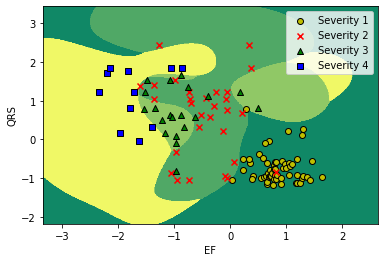

In [17]:
# print best parameters
# Summary of best parameters
best_model_onevsrest = grid_search_onevsrest.best_estimator_
best_params_ovevsrest = grid_search_onevsrest.best_params_
best_gamma = best_params_ovevsrest['estimator__svc__gamma'] 
print('Best gamma: ', best_gamma)
best_C = best_params_ovevsrest['estimator__svc__C'] 
print('Best C: ', best_C)
best_kernel = best_params_ovevsrest['estimator__svc__kernel'] 
print('Best kernel: ', best_kernel)


# print best score
best_score = grid_search_onevsrest.best_score_
print('Best score: ', round(best_score,3))

# plot decision boundary
plotDecisionBoundary(best_model_onevsrest, Features, Labels_predicted)


Which classifier performed the best?

**Your answer:**
<br>
The non-linear classifier from Task 2.6 seems to perform the best as this is a non-separable problem and it is more equipped to handle that. 
<br>
The OneVsRestClassifier seems to overfit and the classifier from Task 2.3 will have issues with the non-separability of the data.

**Total Q2: 30 marks**